In [205]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [206]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dfNetwork = pd.read_csv("/Machine Learning/Data/trafficunicor_ml_2mz.csv")
#se muestra el dataframe
dfNetwork.head()

,src_ip,dst_ip,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic,size_traffic
0,172.16.40.180,172.16.40.1,51954,161,1651680236239,1651680236283,3038,1,44874052
1,172.16.40.180,172.16.40.1,51954,161,1651680236283,1651680236364,686,1,44874052
2,172.16.40.180,172.16.40.6,51954,161,1651680236279,1651680236365,2175,0,9667864
3,172.16.40.180,172.16.40.1,51954,161,1651680236364,1651680236367,690,1,44874052
4,172.16.40.180,172.16.40.2,51954,161,1651680236239,1651680236420,3310,0,41211180


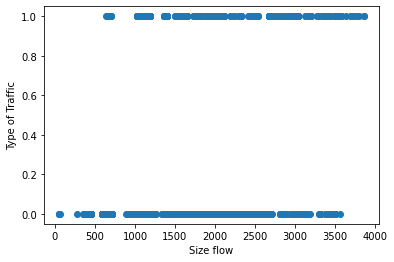

In [207]:
#Se visualiza en una gráfico de dispersión presencia de arañas y tamaño de los granos de arena
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('Type of Traffic')
plott.xlabel('Size flow')
plott.scatter(dfNetwork['bidirectional_bytes'],dfNetwork['target_traffic'])

In [208]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dfNetwork.columns=dfNetwork.columns.str.strip()

In [209]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dfNetwork.drop('src_ip', axis='columns')
# Se elimina la columna id, debido a que no es relevante
inputs_X=dfNetwork.drop('dst_ip', axis='columns')

In [210]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= dfNetwork[['src_port','dst_port','bidirectional_bytes','size_traffic']]

X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=dfNetwork['target_traffic']
#Se visualizan las variables independientes 
X.head()

,src_port,dst_port,bidirectional_bytes,size_traffic
0,51954,161,3038,44874052
1,51954,161,686,44874052
2,51954,161,2175,9667864
3,51954,161,690,44874052
4,51954,161,3310,41211180


In [211]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=30)

In [212]:
#Permite viusalizar información del dataframe
dfNetwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21115 entries, 0 to 21114
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   src_ip                       21115 non-null  object
 1   dst_ip                       21115 non-null  object
 2   src_port                     21115 non-null  int64 
 3   dst_port                     21115 non-null  int64 
 4   bidirectional_first_seen_ms  21115 non-null  int64 
 5   bidirectional_last_seen_ms   21115 non-null  int64 
 6   bidirectional_bytes          21115 non-null  int64 
 7   target_traffic               21115 non-null  int64 
 8   size_traffic                 21115 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [213]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dfNetwork.describe(),2)

,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic,size_traffic
count,21115.00,21115.00,2.111500e+04,2.111500e+04,21115.00,21115.00,21115.00
mean,26168.45,25488.41,1.651680e+12,1.651680e+12,842.03,0.06,15538962.91
std,25896.95,25891.42,5.575528e+04,5.585368e+04,472.13,0.24,12032901.08
min,0.00,0.00,1.651680e+12,1.651680e+12,54.00,0.00,60.00
25%,161.00,161.00,1.651680e+12,1.651680e+12,646.00,0.00,7534314.00
50%,51617.00,161.00,1.651680e+12,1.651680e+12,652.00,0.00,11550981.00
75%,51954.00,51954.00,1.651680e+12,1.651680e+12,670.00,0.00,19252916.00
max,51992.00,51954.00,1.651680e+12,1.651680e+12,3858.00,1.00,44875729.00


In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [215]:
#X_train

In [216]:
y_train

399      0
9408     0
1812     0
11114    0
5352     1
        ..
500      0
12077    0
15277    0
4517     0
5925     0
Name: target_traffic, Length: 16892, dtype: int64

In [217]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [218]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [219]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,src_port,dst_port,bidirectional_bytes,size_traffic
count,1.689200e+04,1.689200e+04,1.689200e+04,1.689200e+04
mean,1.606839e-16,-5.257983e-17,1.072628e-16,-5.047663e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.006331e+00,-9.888903e-01,-1.664572e+00,-1.289272e+00
25%,-1.000114e+00,-9.826724e-01,-4.169993e-01,-6.718656e-01
50%,9.772062e-01,-9.826724e-01,-4.043550e-01,-3.702421e-01
75%,9.998732e-01,1.017588e+00,-3.664221e-01,3.130570e-01
max,1.001341e+00,1.017588e+00,6.351927e+00,2.445528e+00


In [220]:
# Ahora lo haremos con logistica de regresión
#Se define el modelo de logística de regresión 
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [221]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [222]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [223]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [224]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9737153682216434

In [225]:
get_score(SVC(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9737153682216434

In [226]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [227]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9737153682216434

In [228]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [229]:
lg_score

[0.11890893592839892, 0.024154589371980676, 0.046462063086104004]

In [230]:
svm_score

[0.9609319505611592, 0.9907644217107132, 0.9701619778346121]

In [231]:
rf_score

[1.0, 1.0, 1.0]

In [232]:
nby_score

[0.9609319505611592, 0.9907644217107132, 0.9701619778346121]

In [233]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([0.97798295, 0.92755682, 0.99431616, 0.9928952 , 0.98650089])

In [234]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([0.97727273, 0.9272017 , 0.99040853, 0.98614565, 0.98152753])

In [235]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [236]:
cross_val_score(GaussianNB(),X_train,y_train)

array([0.97798295, 0.92755682, 0.99431616, 0.9928952 , 0.98650089])

In [237]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)


RandomForestClassifier()

In [238]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [239]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[6725,    0],
       [   0,  313]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

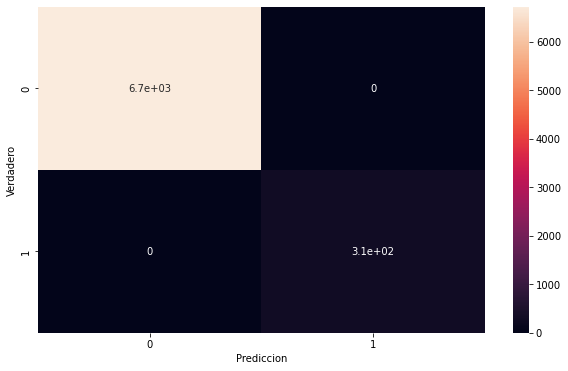

In [242]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

In [243]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6725    0]
 [   0  313]]

True Positives(TP) =  6725

True Negatives(TN) =  313

False Positives(FP) =  0

False Negatives(FN) =  0


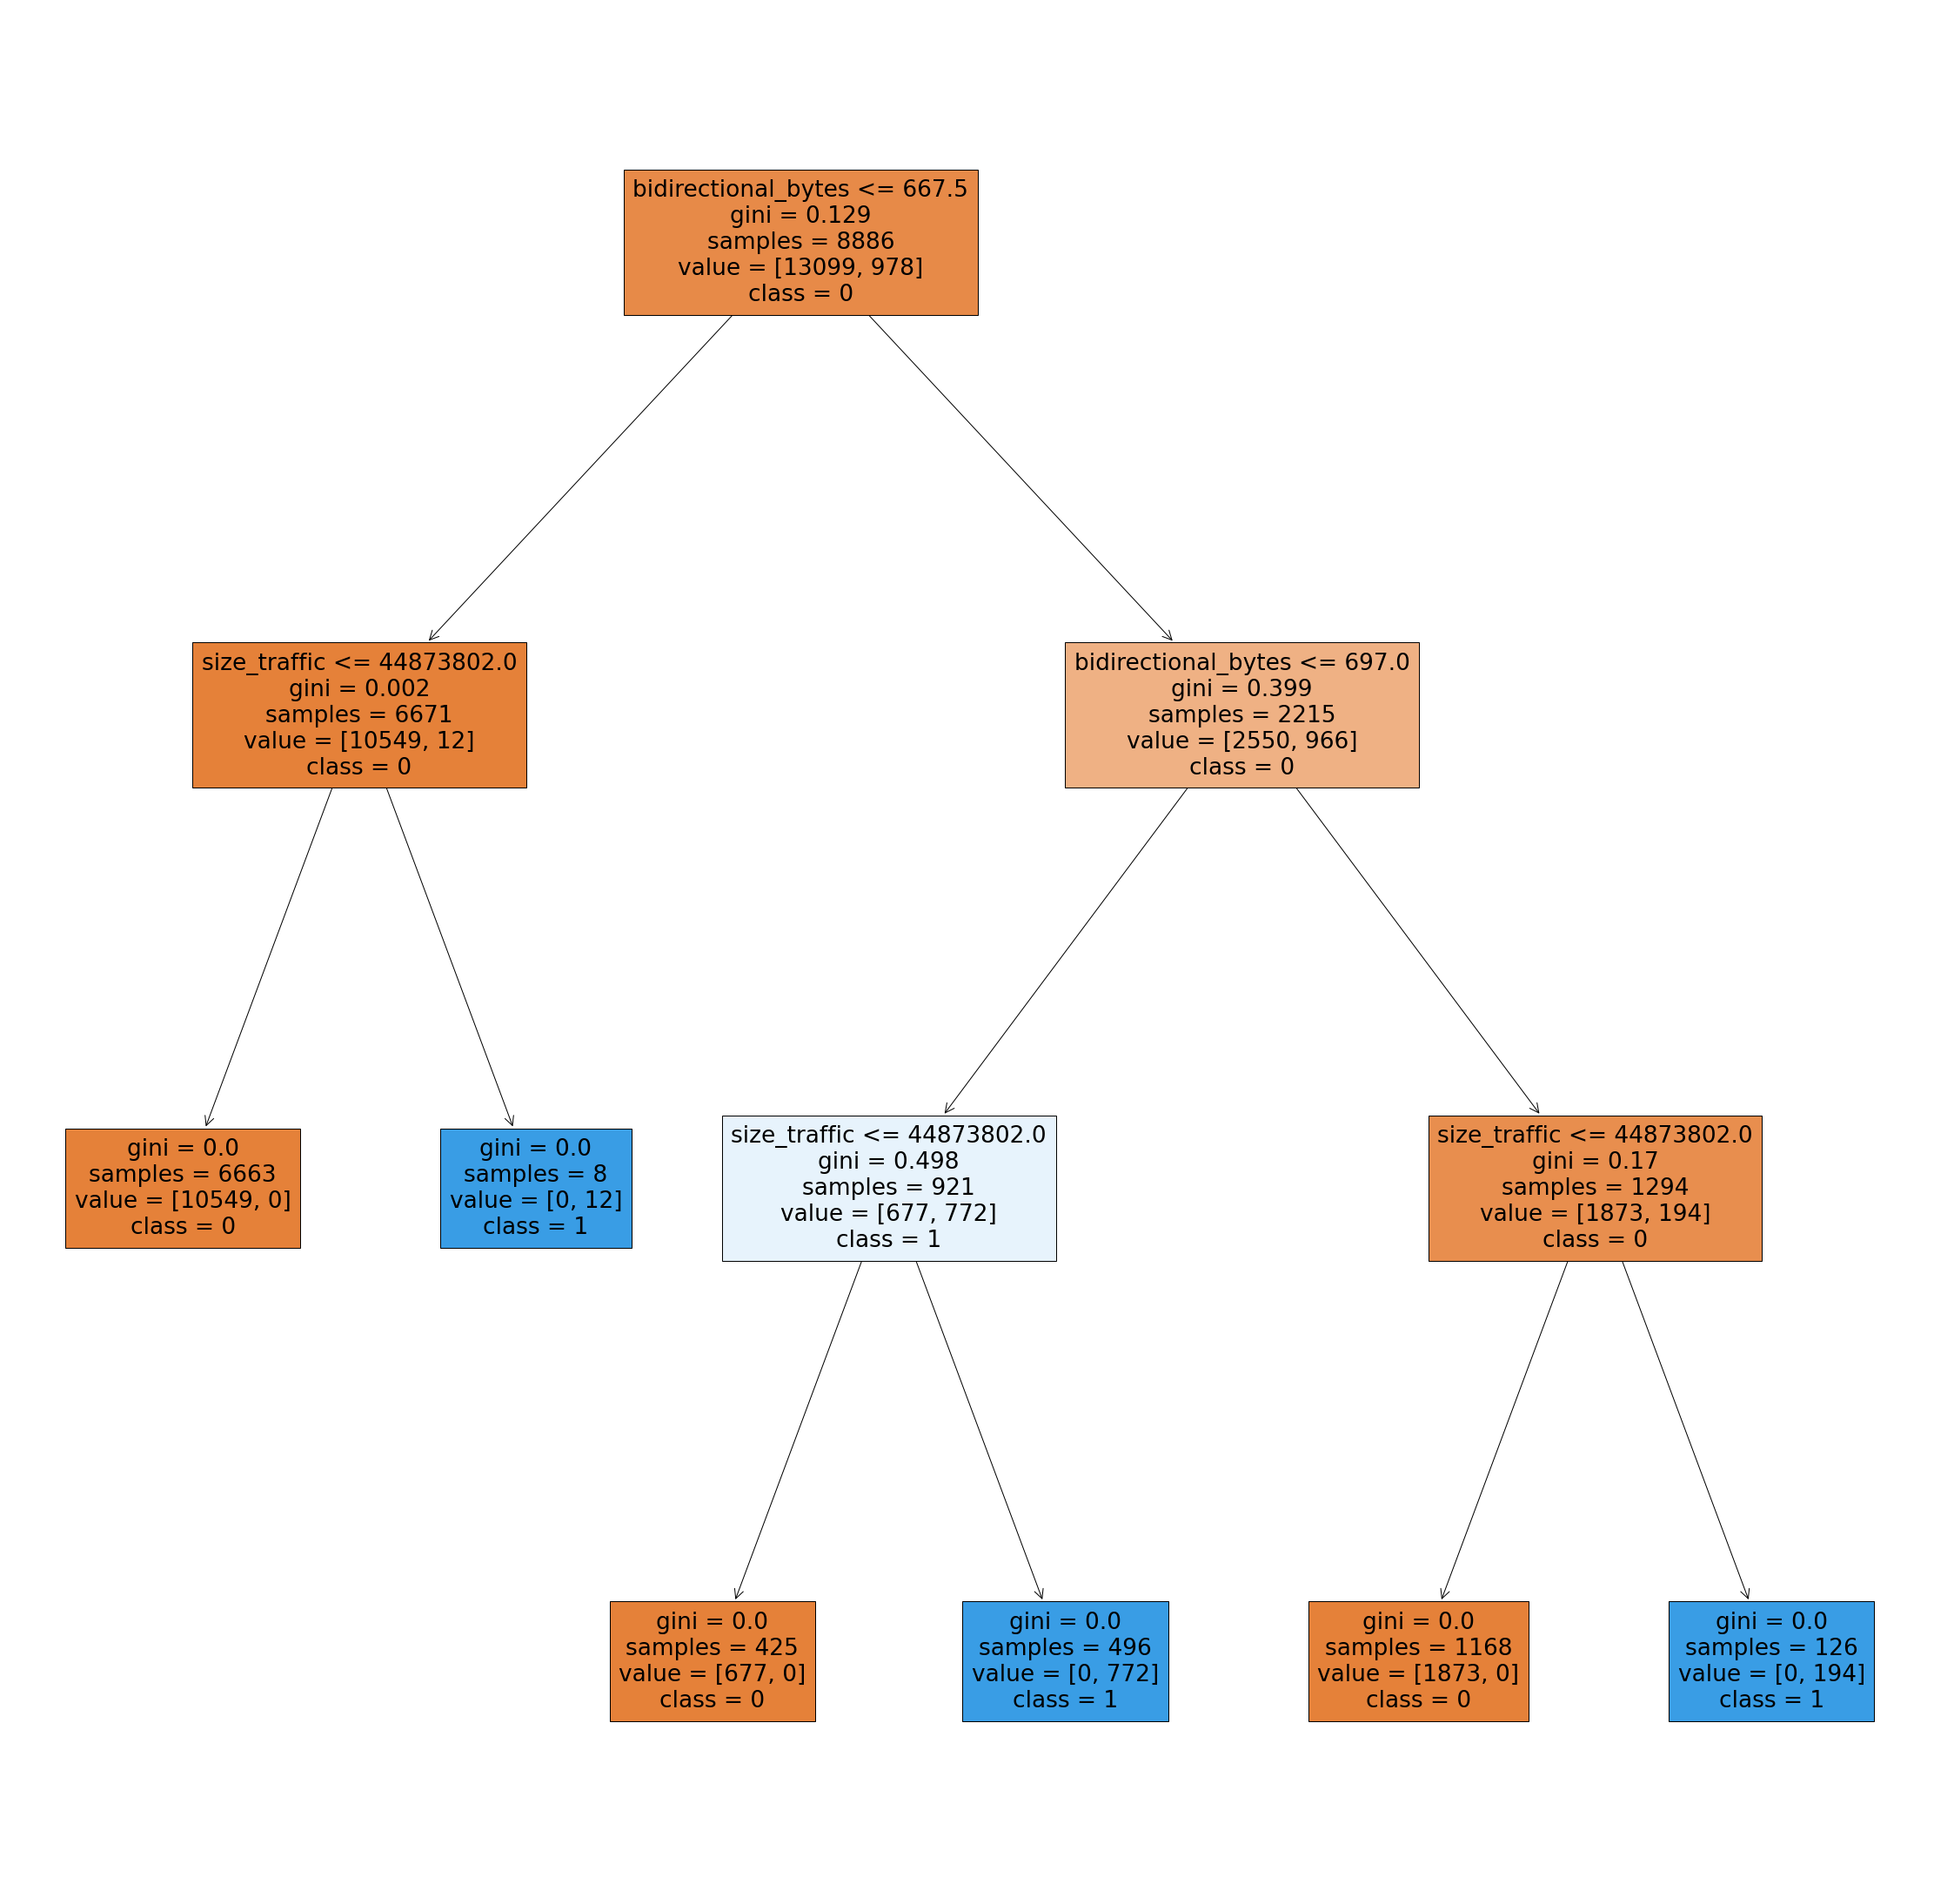

In [248]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[4], feature_names = X_train.columns,class_names=["0", "1"],filled=True);

In [249]:
dfNetwork.target_traffic.value_counts()

0    19805
1     1310
Name: target_traffic, dtype: int64

array([[<AxesSubplot:title={'center':'src_port'}>,
        <AxesSubplot:title={'center':'dst_port'}>],
       [<AxesSubplot:title={'center':'bidirectional_bytes'}>,
        <AxesSubplot:title={'center':'size_traffic'}>]], dtype=object)

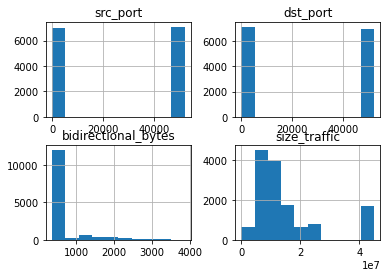

In [250]:
%matplotlib inline
X_train.hist()